In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-data/Credit Card Customer Data.csv')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


# Data Analysis

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [5]:
df.shape

(660, 7)

In [6]:
df['Customer Key'].nunique()

655

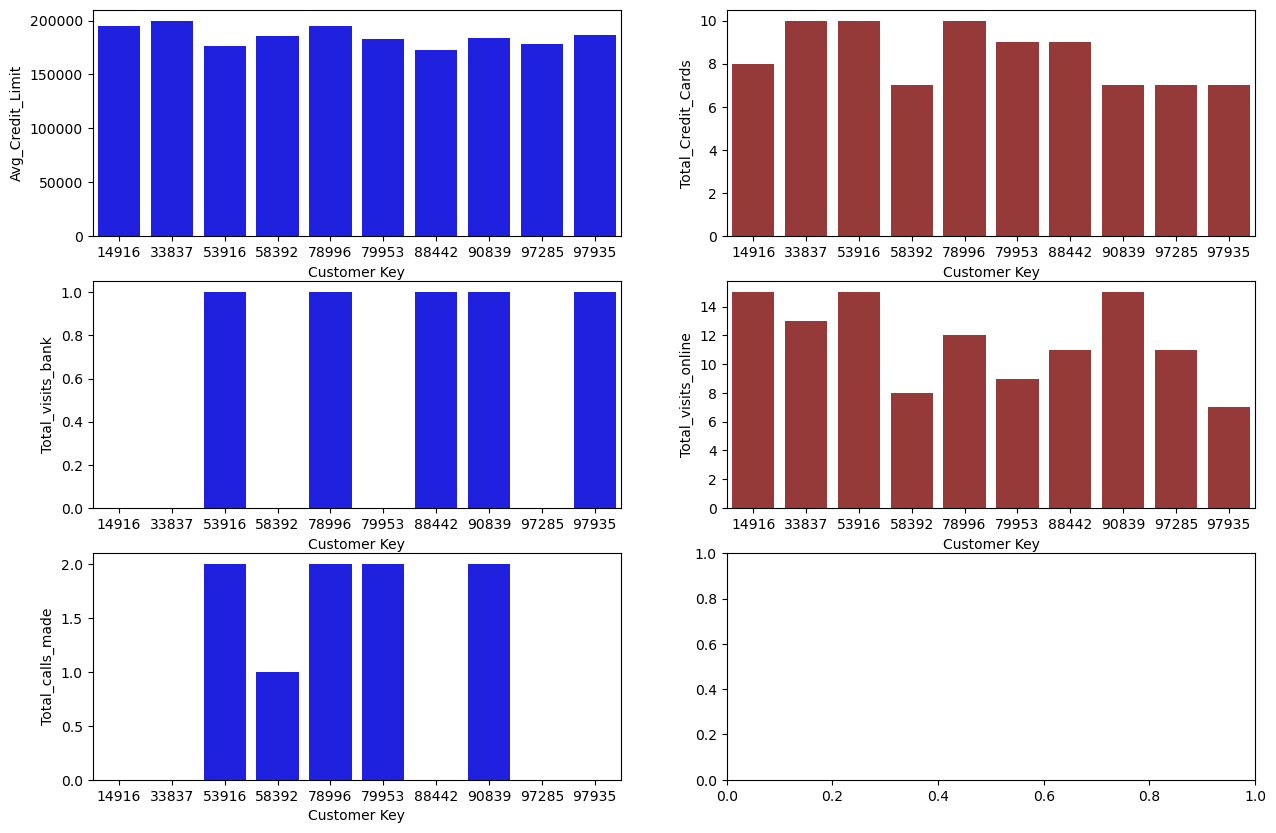

In [7]:
sorted_df = df.sort_values(by=['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'], ascending=False)
top_10_df = sorted_df.head(10)

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
colors = ['blue', 'brown', 'blue', 'brown', 'blue']
sns.barplot(data=top_10_df, x='Customer Key', y='Avg_Credit_Limit', ax=axes[0, 0], color=colors[0])
sns.barplot(data=top_10_df, x='Customer Key', y='Total_Credit_Cards', ax=axes[0, 1], color=colors[1])
sns.barplot(data=top_10_df, x='Customer Key', y='Total_visits_bank', ax=axes[1, 0], color=colors[2])
sns.barplot(data=top_10_df, x='Customer Key', y='Total_visits_online', ax=axes[1, 1], color=colors[3])
sns.barplot(data=top_10_df, x='Customer Key', y='Total_calls_made', ax=axes[2, 0], color=colors[4])

plt.show()


In [8]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

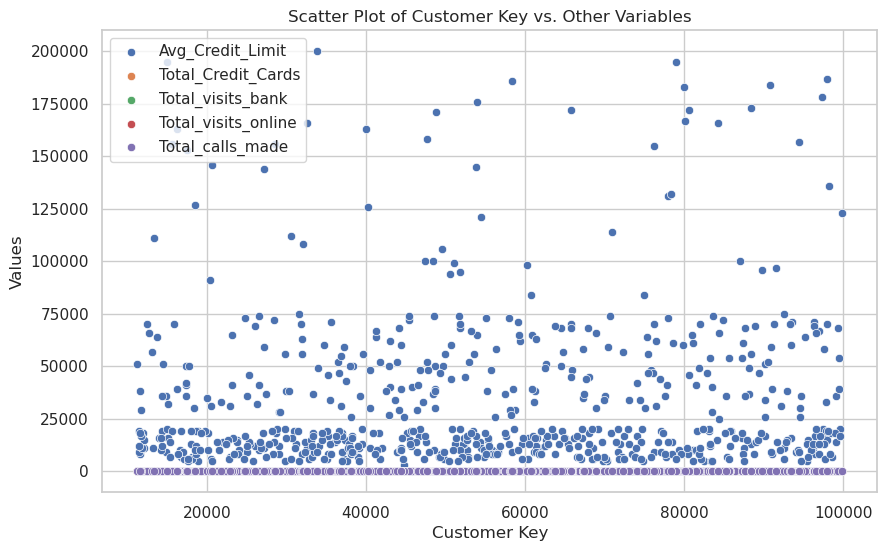

In [9]:
y_vars = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6)) 

for var in y_vars:
    sns.scatterplot(x='Customer Key', y=var, data=df, label=var)

plt.xlabel('Customer Key')
plt.ylabel('Values')
plt.title('Scatter Plot of Customer Key vs. Other Variables')
plt.legend()  
plt.show()


In [10]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [11]:
df.drop('Sl_No',axis=1,inplace=True)

In [12]:
df

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3
...,...,...,...,...,...,...
655,51108,99000,10,1,10,0
656,60732,84000,10,1,13,2
657,53834,145000,8,1,9,1
658,80655,172000,10,1,15,0


# Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']])

scaled_df = pd.DataFrame(scaled_data, columns=['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'])

# Initialize Centroid

In [14]:
def random_centroids(df,k):
    centroids=[]
    for i in range (k):
        centroid = df.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
        return pd.concat(centroids, axis=1)

In [15]:
centroids = random_centroids(df,5)
centroids

,0
Customer Key,33457.0
Avg_Credit_Limit,70000.0
Total_Credit_Cards,6.0
Total_visits_bank,2.0
Total_visits_online,1.0
Total_calls_made,4.0


In [16]:
from sklearn.cluster import KMeans

# Elbow Technique

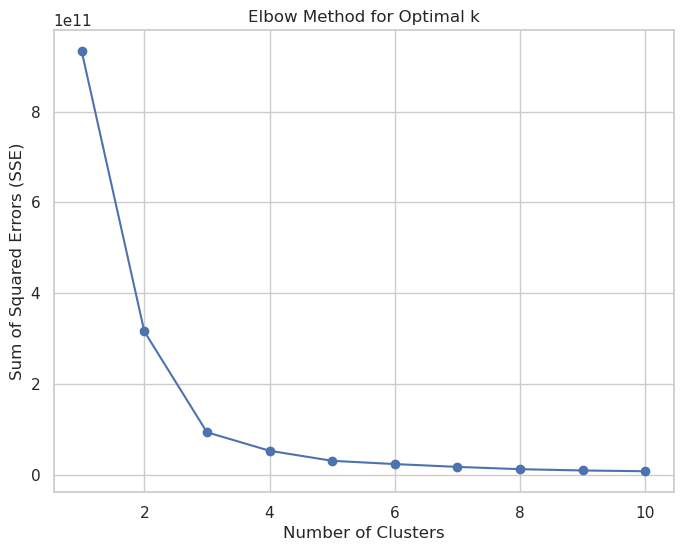

In [17]:

rg = range(1, 11)

sse = []
for k in rg:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']])
    sse.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(rg, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()


# KMeans Fitting and Predicting

In [18]:
kmeans = KMeans(n_clusters=3, random_state=0)
y_pred = kmeans.fit_predict(scaled_df)

print(y_pred)


[0 1 0 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [19]:
df['Cluster']=y_pred
df

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,87073,100000,2,1,1,0,0
1,38414,50000,3,0,10,9,1
2,17341,50000,7,1,3,4,0
3,40496,30000,5,1,1,4,1
4,47437,100000,6,0,12,3,2
...,...,...,...,...,...,...,...
655,51108,99000,10,1,10,0,2
656,60732,84000,10,1,13,2,2
657,53834,145000,8,1,9,1,2
658,80655,172000,10,1,15,0,2


In [20]:
df.columns

Index(['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made',
       'Cluster'],
      dtype='object')

In [21]:
ID = df['Customer Key']


Features = df[['Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made','Cluster']]

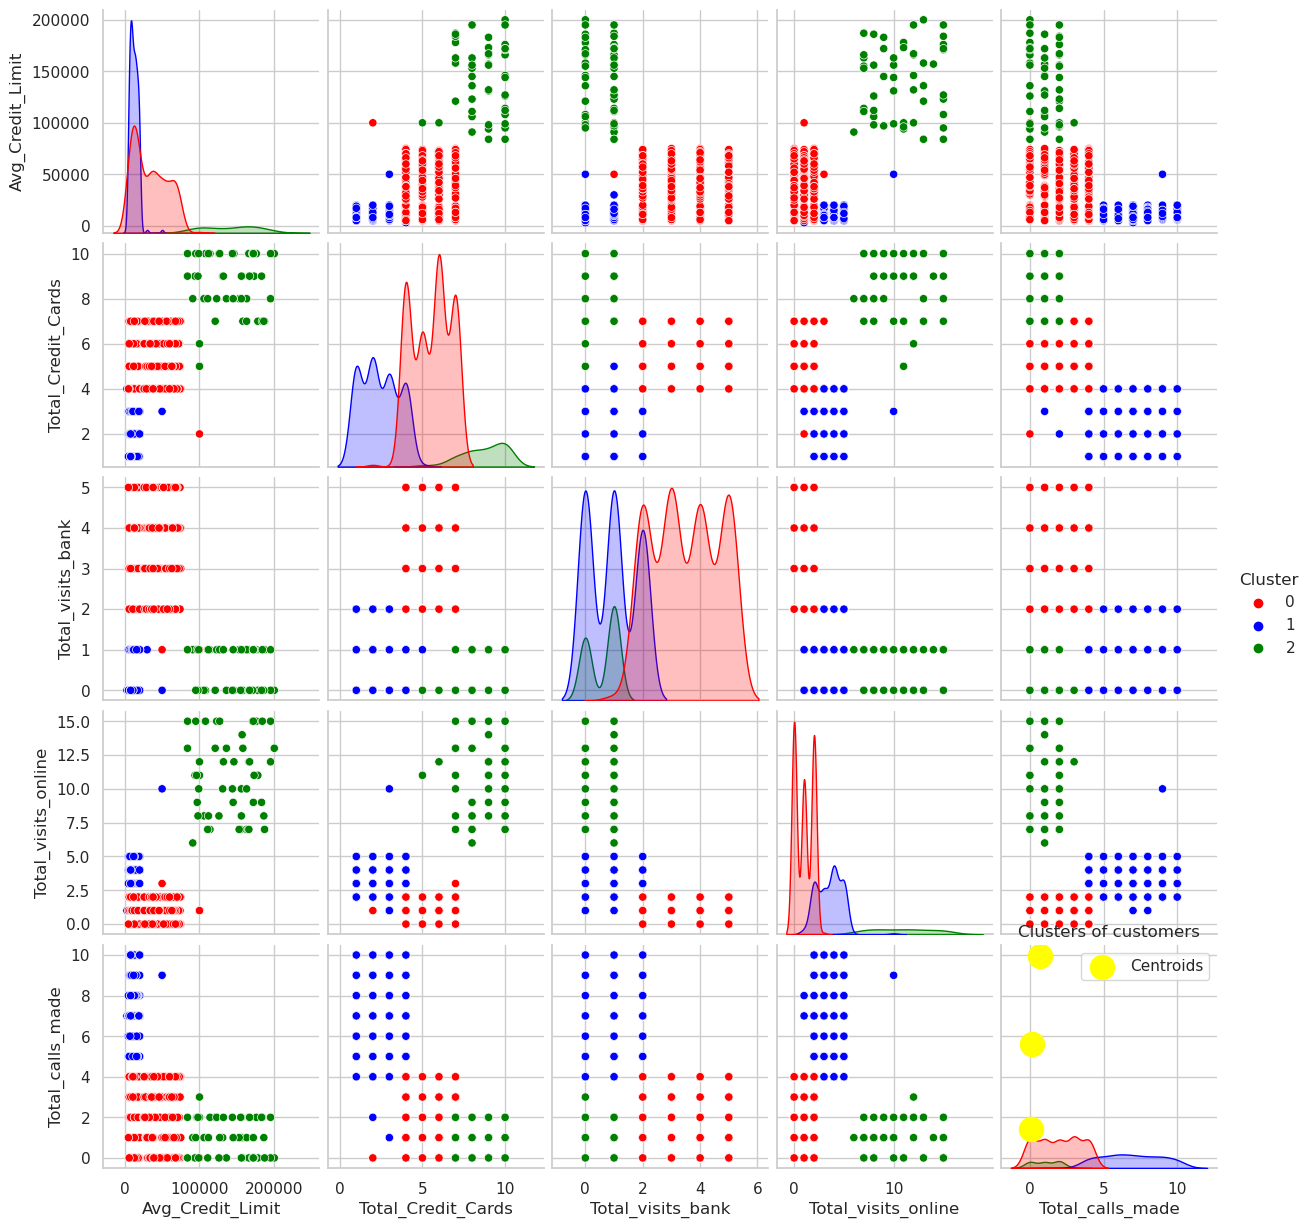

In [22]:

sns.pairplot(Features, hue='Cluster', palette={0: 'red', 1: 'blue', 2: 'green'})

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of customers')
plt.legend()
plt.show()
